In [49]:
import osmnx as ox
import networkx as nx
from IPython.display import IFrame

import json


ox.config(log_console=True,
          use_cache=True)



/tmp/ipykernel_45588/1415198094.py:8: FutureWarning: The `utils.config` function is deprecated and will be removed in the v2.0.0 release. Instead, use the `settings` module directly to configure a global setting's value. For example, `ox.settings.log_console=True`. See the OSMnx v2 migration guide: https://github.com/gboeing/osmnx/issues/1123
  ox.config(log_console=True,


In [50]:
points_pastizal  = [[42.310665, -6.207228], [42.30961,	-6.201653], [42.310527,	-6.20393]]
points_arbustivo = [[42.31036,	-6.204549], [42.310902,	-6.206416]]
points_matorral  = [[42.310832,	-6.203042],	[42.311749,	-6.205465]]
water_points     = [[42.309282,	-6.204025],	[42.312561,	-6.204347]]
water_points_1   = [42.309282,	-6.204025]
Tabuyo_del_Monte = [42.3137131, -6.2031109]
Luyego           = [42.3430707, -6.2353512]
Granja           = [42.310399, -6.206688]

In [51]:
G = ox.graph_from_place('Luyego', network_type='all_private')

originId, dist_Id = ox.distance.nearest_nodes(G, Tabuyo_del_Monte[1], Tabuyo_del_Monte[0], return_dist=True)
distId1 , dist_1= ox.distance.nearest_nodes(G, Luyego[1], Luyego[0], return_dist=True)
distId2 , dist_2= ox.distance.nearest_nodes(G, water_points_1[1], water_points_1[0], return_dist=True)

print(originId,distId1,distId2)

route = nx.shortest_path(G, originId, distId2, weight='length')

route_map = ox.plot_route_folium(G, route)


route_map

899234936 7636026248 899227771


/tmp/ipykernel_45588/1154707421.py:11: FutureWarning: The `folium` module has been deprecated and will be removed in the v2.0.0 release. You can generate and explore interactive web maps of graph nodes, edges, and/or routes automatically using GeoPandas.GeoDataFrame.explore instead, for example like: `ox.graph_to_gdfs(G, nodes=False).explore()`. See the OSMnx examples gallery for complete details and demonstrations.
  route_map = ox.plot_route_folium(G, route)


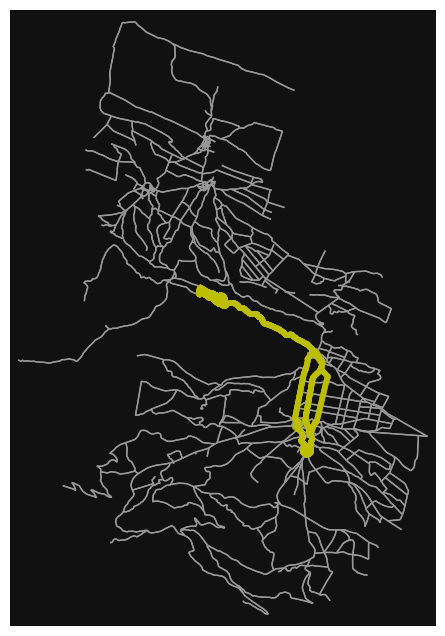

In [52]:
routes = ox.k_shortest_paths(G, distId1, distId2, k=30, weight="length")
fig, ax = ox.plot_graph_routes(G, list(routes), route_colors="y", route_linewidth=4, node_size=0)

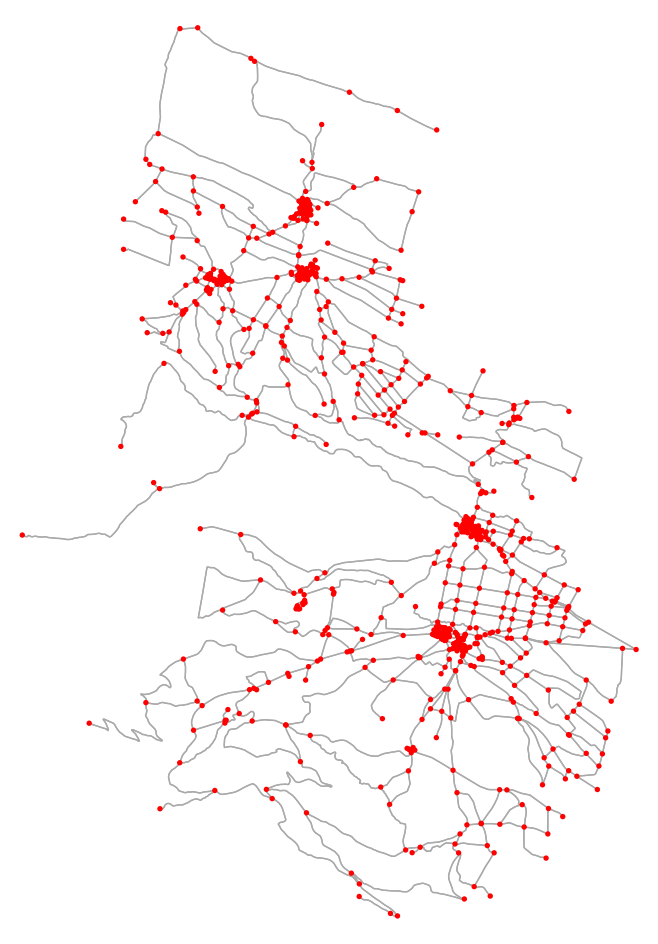

(<Figure size 1200x1200 with 1 Axes>, <AxesSubplot:>)

In [53]:
import osmnx as ox
G = ox.graph_from_place('Luyego', network_type='bike')
ox.plot_graph(G, bgcolor="w", node_color="r", edge_color="#aaa", figsize=(12,12))

In [54]:
import matplotlib.pyplot as plt
import matplotlib.patheffects as PathEffects

def show_directions(origin_node_id):
  map_limit_x = 0.0065
  map_limit_y = 0.0025
  fig = plt.figure(figsize=(8,8))
  ax = plt.axes()
  origin_node = G.nodes.get(origin_node_id)

  G2 = nx.generators.ego_graph(G, origin_node_id, radius=8)
  gdf_nodes, gdf_edges = ox.graph_to_gdfs(G2)

  gdf_edges.plot(ax=ax, color="#aaa")
  gdf_nodes.plot(ax=ax, color="r", zorder=12)
  ax.set_xlim(origin_node["x"]-map_limit_x, origin_node["x"]+map_limit_x)
  ax.set_ylim(origin_node["y"]-map_limit_y, origin_node["y"]+map_limit_y)

  for node_id in list(G.neighbors(origin_node_id)) + [origin_node_id]:
    node = G.nodes.get(node_id)
    txt = ax.annotate(text=f"{node_id}", xy=(node["x"]+0.0001,node["y"]+0.0001),
                  horizontalalignment='left', fontsize=10, wrap=True, color='k', zorder=11)
    txt.set_path_effects([PathEffects.withStroke(linewidth=4, foreground='w')])

    if node_id != origin_node_id:
      ax.quiver(origin_node["x"], origin_node["y"], node["x"]-origin_node["x"], node["y"]-origin_node["y"], angles='xy', scale_units='xy', scale=1, zorder=10)

  ax.set_axis_on()

{'y': 42.3096337, 'x': -6.2054521, 'street_count': 3}
[7636232385, 7636232390, 7636232603]

=== Edge ====
Source and target node ID: (7636232387, 7636232385)
Edge attributes: {
    "osmid": 817655739,
    "highway": "track",
    "oneway": false,
    "reversed": false,
    "length": 166.801
}

=== Edge ====
Source and target node ID: (7636232387, 7636232390)
Edge attributes: {
    "osmid": 817655739,
    "highway": "track",
    "oneway": false,
    "reversed": true,
    "length": 142.245
}

=== Edge ====
Source and target node ID: (7636232387, 7636232603)
Edge attributes: {
    "osmid": 817655725,
    "highway": "track",
    "oneway": false,
    "reversed": false,
    "length": 595.477
}


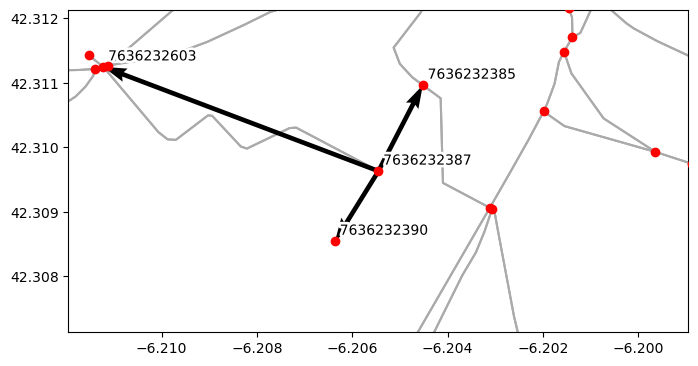

In [55]:

import osmnx as ox
G = ox.graph_from_place('Luyego', network_type='bike')
# ox.plot_graph(G, bgcolor="w", node_color="r", edge_color="#aaa", figsize=(22,12))

originId, dist_Id = ox.distance.nearest_nodes(G, Granja[1], Granja[0], return_dist=True)

print(G.nodes.get(originId))
print(list(G.neighbors(originId)))

# show edge attributes
for edge in G.out_edges(originId, data=True):
    print("\n=== Edge ====")
    print("Source and target node ID:", edge[:2])
    edge_attributes = edge[2]
    # remove geometry object from output
    edge_attributes_wo_geometry = {i:edge_attributes[i] for i in edge_attributes if i!='geometry'}
    print("Edge attributes:", json.dumps(edge_attributes_wo_geometry, indent=4))

show_directions(originId)


In [56]:
''' Calculate the route between two points and then calculate the distance when using
these alternative routes'''

G = ox.graph_from_place('Luyego', network_type='all_private')

G



originId, dist_Id = ox.distance.nearest_nodes(G, Granja[1], Granja[0], return_dist=True)
distId2 , dist_2= ox.distance.nearest_nodes(G, water_points_1[1], water_points_1[0], return_dist=True)

print(originId,distId1,distId2)
# G.add_edge(Granja, originId)

route = nx.shortest_path(G, originId, distId2, weight='length')
length = nx.shortest_path_length(G=G, source=originId, target=distId2, weight='length')

print (length)

route_map = ox.plot_route_folium(G, route)


route_map

7636232387 7636026248 899227771
442.468


/tmp/ipykernel_45588/461287070.py:21: FutureWarning: The `folium` module has been deprecated and will be removed in the v2.0.0 release. You can generate and explore interactive web maps of graph nodes, edges, and/or routes automatically using GeoPandas.GeoDataFrame.explore instead, for example like: `ox.graph_to_gdfs(G, nodes=False).explore()`. See the OSMnx examples gallery for complete details and demonstrations.
  route_map = ox.plot_route_folium(G, route)


In [57]:
# import geopandas as gpd
# import numpy as np
# import osmnx as ox
# ox.settings.log_console = True

# # create graph and extract node geometries
# G = ox.graph.graph_from_place('New York City, New York, United States', network_type="all", retain_all=True)
# gdf_nodes = ox.graph_to_gdfs(G, edges=False)[['geometry']]

# # create array of 44,000 points
# coords = np.array([(40.718797266, -73.753347584), (40.713511106, -73.759968316)] * 2200)

# # get 1km buffers around each point
# points = gpd.GeoDataFrame(crs='epsg:4326', geometry=gpd.points_from_xy(coords[:, 1], coords[:, 0]))
# buffers = ox.project_gdf(ox.project_gdf(points).buffer(1000), to_latlong=True)
# gdf_buffers = gpd.GeoDataFrame(geometry=buffers)

# # find all the nodes within the buffer of each point
# result = gpd.sjoin(gdf_buffers, gdf_nodes, how='left', predicate='intersects')['index_right']